In [0]:
help(dbutils)

Help on DBUtils in module dbruntime.dbutils object:

class DBUtils(builtins.object)
 |  DBUtils(py_shell, entry_point, sc, sqlContext, displayHTML)
 |  
 |  This class provides dbutils functionality for python notebooks, just like dbutils_v1.scala does
 |  it for Scala. For each of the calls here, we do two things: check whether the passed types are
 |  correct, and if so make a corresponding call to FSUtils object in Scala. For ls and mounts we do
 |  one extra thing - instead of returning result directly, we create a PythonSchemaSeq from it
 |  first. This is done to enable further operations with the result (e.g. call display function
 |  on it, or perform list operations on it)
 |  
 |  Methods defined here:
 |  
 |  __call__(self)
 |      Call self as a function.
 |  
 |  __getattr__(self, item: 'str') -> 'Union[FSHandler, JobsHandler, NotebookHandler, SecretsHandler, PreviewHandler, WidgetsHandlerImpl, LibraryHandler, CredentialsHandler, DataHandler]'
 |  
 |  __getattribute__(se

In [0]:
spark

In [0]:
dbutils.fs.ls('dbfs:/public/coursera')

[FileInfo(path='dbfs:/public/coursera/genre.csv', name='genre.csv', size=3380964, modificationTime=1759027258000),
 FileInfo(path='dbfs:/public/coursera/listenings.csv', name='listenings.csv', size=1089683768, modificationTime=1759027617000)]

In [0]:
listening_df = spark.read.csv(path = 'dbfs:/public/coursera/listenings.csv',inferSchema=True, header=True)

In [0]:
listening_df.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- date: long (nullable = true)
 |-- track: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- album: string (nullable = true)



In [0]:
from pyspark.sql.functions import *

In [0]:
listening_df.show()

+-----------+-------------+--------------------+---------------+--------------------+
|    user_id|         date|               track|         artist|               album|
+-----------+-------------+--------------------+---------------+--------------------+
|000Silenced|1299680100000|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|1299679920000|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|1299679440000|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|1299679200000|            Acapella|          Kelis|            Acapella|
|000Silenced|1299675660000|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|1297511400000|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|1294498440000|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|1292438340000|               ObZen|      Meshuggah|               ObZen|
|000Silenced|1292437740000|   Yama's Messengers|      

In [0]:
listening_df.count()

14650594

In [0]:
listening_df = listening_df.na.drop()

In [0]:
listening_df.count()

13758905

In [0]:
listening_df = listening_df.drop("date")

In [0]:
shape = (listening_df.count(), len(listening_df.columns))
shape

(13758905, 4)

In [0]:
subset_df_0 = listening_df.select("track", "artist")
subset_df_0.show()

+--------------------+---------------+
|               track|         artist|
+--------------------+---------------+
|           Price Tag|       Jessie J|
|Price Tag (Acoust...|       Jessie J|
|Be Mine! (Ballad ...|          Robyn|
|            Acapella|          Kelis|
|   I'm Not Invisible|      The Tease|
|Bounce (Feat NORE...|       MSTRKRFT|
|Don't Stop The Mu...|        Rihanna|
|               ObZen|      Meshuggah|
|   Yama's Messengers|         Gojira|
|On the Brink of E...|   Napalm Death|
|On the Brink of E...|   Napalm Death|
|        In Deference|   Napalm Death|
|      Post(?)organic|    Decapitated|
|        Mind Feeders|   Dom & Roland|
|Necrosadistic War...|Cannibal Corpse|
|     Dance All Night|   Dom & Roland|
|          Late Night|   Dom & Roland|
|          Freak Seen|   Dom & Roland|
|Paradrenasite (Hi...|   Dom & Roland|
|               Rhino|   Dom & Roland|
+--------------------+---------------+
only showing top 20 rows



In [0]:
#Query 1: Find all the records of those users who have listened to Rihanna 
listening_df.select('*').filter(col("artist") == 'Rihanna').show()

+-----------+--------------------+-------+--------------------+
|    user_id|               track| artist|               album|
+-----------+--------------------+-------+--------------------+
|000Silenced|Don't Stop The Mu...|Rihanna|Addicted 2 Bassli...|
|000Silenced|           Disturbia|Rihanna|Good Girl Gone Ba...|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|         Complicated|Rihanna|                Loud|
|00williamsl|What's My Name (f...|Rihanna|                Loud|
|00williamsl|Kanye West feat R...|Rihanna|                Loud|
|    0502008|Only Girl (In the...|Rihanna|                Loud|
|      0rdos|Pon De Replay (Re...|Rihanna|    Music of the Sun|
|      0rdos|          Now I Know|Rihanna|    Music of the Sun|
|      0rdos|There's a Thug in...|Rihanna|    Music of the Sun|
|      0rdos|                Rush|Rihanna|    Music of the Sun|
|      0rdos|              Let Me|Rihann

In [0]:
#Query 2: Find top 10 users who are fan of Rihanna
listening_df.select("user_id").filter(col("artist") == 'Rihanna').groupby('user_id').\
    agg(count('user_id').alias('listened_times')).\
        orderBy(desc('listened_times')).limit(10).show()

+---------------+--------------+
|        user_id|listened_times|
+---------------+--------------+
|        thiessu|           179|
|    eyessetkyle|           166|
|           adxx|           164|
|missnumberthree|           156|
|helloiamnatalie|           128|
|          nmjnb|           124|
|        AndyyyA|           123|
|     BIGBANG186|           121|
|     mixedvibes|           120|
|       AndyKitt|           115|
+---------------+--------------+



In [0]:
#Query 3: Find top 10 Famous tracks
#same name track can be by 2 different artists
listening_df.groupby('artist', 'track').agg( count('*').alias('streamed_count') ).\
    orderBy(desc('streamed_count')).limit(10).show(truncate=False)

+--------------+----------------+--------------+
|artist        |track           |streamed_count|
+--------------+----------------+--------------+
|Justin Bieber |Sorry           |3381          |
|Arctic Monkeys|Do I Wanna Know?|2865          |
|Bon Iver      |Skinny Love     |2836          |
|Zayn          |PILLOWTALK      |2701          |
|The Killers   |Mr Brightside   |2690          |
|Rihanna       |Work            |2646          |
|Bastille      |Pompeii         |2606          |
|Mumford & Sons|Little Lion Man |2520          |
|Mumford & Sons|The Cave        |2485          |
|Justin Bieber |Love Yourself   |2481          |
+--------------+----------------+--------------+



In [0]:
#Query 4: Find top 10 famous tracks of Rihanna
listening_df.select("artist", "track").filter(col('artist') == 'Rihanna').\
    groupby("artist", "track").\
        agg(count("*").alias('count')).\
            sort(desc('count')).\
                limit(10).\
                    show(truncate=False)

+-------+----------------------------------+-----+
|artist |track                             |count|
+-------+----------------------------------+-----+
|Rihanna|Work                              |2646 |
|Rihanna|Only Girl (In the World)          |1749 |
|Rihanna|We Found Love (feat Calvin Harris)|1575 |
|Rihanna|S&M                               |1307 |
|Rihanna|Rude Boy                          |1303 |
|Rihanna|Diamonds                          |1224 |
|Rihanna|Kiss it Better                    |945  |
|Rihanna|Where Have You Been               |844  |
|Rihanna|Cheers (Drink to That)            |697  |
|Rihanna|Needed Me                         |679  |
+-------+----------------------------------+-----+



In [0]:
#Query 5: Find top 10 famous albums
listening_df.select("artist", "album").\
    groupBy("artist", "album").\
        agg( count("*").alias('count') ).\
            sort(desc('count')).\
                limit(10).\
                    show(truncate=False)

+----------------------+------------------------+-----+
|artist                |album                   |count|
+----------------------+------------------------+-----+
|Kanye West            |The Life Of Pablo       |22310|
|The xx                |xx                      |14195|
|Arctic Monkeys        |AM                      |14090|
|alt-J                 |An Awesome Wave         |13635|
|Mumford & Sons        |Sigh No More            |13543|
|Arctic Monkeys        |Whatever People Say I Am|12731|
|Bon Iver              |For Emma                |11994|
|Grimes                |Art Angels              |11655|
|Florence + the Machine|Lungs                   |11362|
|Adele                 |21                      |11215|
+----------------------+------------------------+-----+



In [0]:
#import genre.csv
genre_df = spark.read.csv(path='dbfs:/public/coursera/genre.csv', inferSchema=True, header=True)

In [0]:
#check the data
genre_df.show(100)

+--------------------+-------------+
|              artist|        genre|
+--------------------+-------------+
|                Muse|         rock|
|             Nirvana|         rock|
|            Bon Jovi|         rock|
|          The Police|         rock|
|                Kiss|         rock|
|       Guns N' Roses|         rock|
|         Rusted Root|         rock|
|Katrina and the W...|          pop|
|         The Beatles|         rock|
|        Hall & Oates|          pop|
|        Otis Redding|         soul|
|         Marvin Gaye|         soul|
|     The Cranberries|         rock|
|            Survivor|         rock|
|       Fleetwood Mac|        blues|
|           Radiohead|         rock|
|                Toto|         rock|
|                  U2|         rock|
|Creedence Clearwa...|         rock|
|                 REM|         rock|
|   Simon & Garfunkel|         folk|
|        Van Morrison|        blues|
|      Lynyrd Skynyrd|southern rock|
|      Claude Debussy|    classical|
|

In [0]:
#inner join these two dataframes
merged_df = listening_df.join(genre_df, on = "artist", how = "inner" )

In [0]:
#check the data
merged_df.show(truncate=False)

+------------+-----------+--------------------------------------------+-----------------------+----------------------------+
|artist      |user_id    |track                                       |album                  |genre                       |
+------------+-----------+--------------------------------------------+-----------------------+----------------------------+
|Jessie J    |000Silenced|Price Tag                                   |Who You Are            | Ariana Grande & Nicki Minaj|
|Jessie J    |000Silenced|Price Tag                                   |Who You Are            | Jhene Aiko & Rixton        |
|Jessie J    |000Silenced|Price Tag                                   |Who You Are            | Nicki Minaj & Ariana Grande|
|Jessie J    |000Silenced|Price Tag                                   |Who You Are            |pop                         |
|Jessie J    |000Silenced|Price Tag (Acoustic Version)                |Price Tag              | Ariana Grande & Nicki Minaj|


In [0]:
#Query 6: find top 10 users who are fan of pop music
merged_df.select('user_id', 'genre').\
    filter(col("genre") == "pop").\
        groupBy("user_id").\
            agg(count('*').alias('count')).\
                sort(desc('count')).\
                    limit(10).show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        01Green|  496|
|          mrpsb|  400|
|      momousagi|  400|
|   BlueKnockOut|  378|
|    musicboy80s|  376|
|  incultojurgis|  374|
| ElektricOrchid|  370|
|foreign_fanatic|  350|
|   Kevin_Soutar|  346|
|  landrover2171|  301|
+---------------+-----+



In [0]:
#Query 7: find top 10 famous genres
merged_df.select('genre').groupBy("genre").count().orderBy(desc('count')).limit(10).show()

+----------+-------+
|     genre|  count|
+----------+-------+
|      rock|2691934|
|       pop|1544747|
|electronic| 551509|
|   hip hop| 532984|
|      folk| 438174|
|indie rock| 431439|
|      punk| 380915|
|       r&b| 344101|
|     metal| 208107|
|     indie| 206726|
+----------+-------+



In [0]:
#Query 8: find each user's fav genre
q8= merged_df.select('user_id', 'genre').groupBy('user_id', 'genre').agg(count('*').alias('count')).\
    orderBy('user_id')
q8.show()

+-------+--------------------+-----+
|user_id|               genre|count|
+-------+--------------------+-----+
| --Seph|              trance|    1|
| --Seph|          Thom Yorke|    2|
| --Seph| Richard Armitage...|    1|
| --Seph|           classical|   31|
| --Seph|         folktronica|    2|
| --Seph|          Snoop Dogg|    4|
| --Seph|               indie|    3|
| --Seph|              techno|    3|
| --Seph|                 80s|    1|
| --Seph|      Alice Sara Ott|    2|
| --Seph| Ne-Yo & Nicky Ro...|    1|
| --Seph|         heavy metal|    1|
| --Seph| Sara Mingardo & ...|    1|
| --Seph|             hip hop|    7|
| --Seph|       chamber music|    1|
| --Seph|                rock|   27|
| --Seph| Charis Henry & M...|    4|
| --Seph|          ninja tune|    1|
| --Seph|                soul|    1|
| --Seph|     Hilko Schomerus|    1|
+-------+--------------------+-----+
only showing top 20 rows



In [0]:
help(struct)

Help on function struct in module pyspark.sql.functions.builtin:

struct(*cols: Union[ForwardRef('ColumnOrName'), List[ForwardRef('ColumnOrName_')], Tuple[ForwardRef('ColumnOrName_'), ...]]) -> pyspark.sql.column.Column
    Creates a new struct column.
    
    .. versionadded:: 1.4.0
    
    .. versionchanged:: 3.4.0
        Supports Spark Connect.
    
    Parameters
    ----------
    cols : list, set, str or :class:`~pyspark.sql.Column`
        column names or :class:`~pyspark.sql.Column`\s to contain in the output struct.
    
    Returns
    -------
    :class:`~pyspark.sql.Column`
        a struct type column of given columns.
    
    Examples
    --------
    >>> df = spark.createDataFrame([("Alice", 2), ("Bob", 5)], ("name", "age"))
    >>> df.select(struct('age', 'name').alias("struct")).collect()
    [Row(struct=Row(age=2, name='Alice')), Row(struct=Row(age=5, name='Bob'))]
    >>> df.select(struct([df.age, df.name]).alias("struct")).collect()
    [Row(struct=Row(age=2, na

In [0]:
q8.groupBy("user_id").\
    agg(max( struct( col('count'), col('genre') ) ).alias('max')).\
        select('user_id', 'max.genre').\
        orderBy('user_id').\
            show()

+---------------+-------------+
|        user_id|        genre|
+---------------+-------------+
|         --Seph|    classical|
|      --Shinn--|         rock|
|   --ladyluck--|   soundtrack|
|      --mopsi--|   electronic|
|       --ollz--|         rock|
|       --tomB--|         rock|
|     -Amnesiac-|        metal|
|         -Bald-|    indie pop|
|       -Barney-|   doom metal|
|        -Bevan-|drum and bass|
|         -Bish-|         rock|
|        -Danni-|         rock|
|          -DeWp|      hip hop|
|    -Destructo-|         rock|
|      -Faction-|         rock|
|-February-Star-|         rock|
|        -Gemma-|  british pop|
|   -Gingergirl-|          pop|
|        -Hazel-|     synthpop|
|        -Heiko-|   electronic|
+---------------+-------------+
only showing top 20 rows



In [0]:
help(col('x').isin)

Help on method isin in module pyspark.sql.column:

isin(*cols: Any) -> 'Column' method of pyspark.sql.column.Column instance
    A boolean expression that is evaluated to true if the value of this
    expression is contained by the evaluated values of the arguments.
    
    .. versionadded:: 1.5.0
    
    .. versionchanged:: 3.4.0
        Supports Spark Connect.
    
    Parameters
    ----------
    cols : Any
        The values to compare with the column values. The result will only be true at a location
        if any value matches in the Column.
    
    Returns
    -------
    :class:`Column`
        Column of booleans showing whether each element in the Column is contained in cols.
    
    Examples
    --------
    >>> df = spark.createDataFrame([(2, "Alice"), (5, "Bob"), (8, "Mike")], ["age", "name"])
    
    Example 1: Filter rows with names in the specified values
    
    >>> df[df.name.isin("Bob", "Mike")].show()
    +---+----+
    |age|name|
    +---+----+
    |  5| Bob

In [0]:
#Query 9: find out how many pop, rock, metal and hip hop singers
q9 = genre_df.select("genre").\
    filter( col("genre").isin(['pop', 'rock', 'metal', 'hip hop']) ).\
        groupBy('genre').count()
q9.show()

+-------+-----+
|  genre|count|
+-------+-----+
|    pop| 6960|
|hip hop| 4288|
|  metal| 1854|
|   rock| 9066|
+-------+-----+



In [0]:
#Visualize results using matplotlib
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt

(array([0, 1, 2, 3]),
 [Text(0, 0, 'pop'),
  Text(1, 0, 'hip hop'),
  Text(2, 0, 'metal'),
  Text(3, 0, 'rock')])

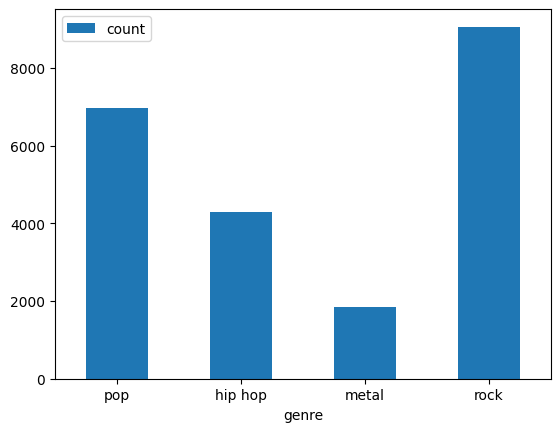

In [0]:
q9_pd = q9.toPandas()
q9_pd.plot(kind='bar', x='genre',y='count')
plt.xticks(rotation=0) # 'ha' for horizontal alignment

In [0]:
help(q9_pd.plot)

Help on PlotAccessor in module pandas.plotting._core object:

class PlotAccessor(pandas.core.base.PandasObject)
 |  PlotAccessor(data) -> 'None'
 |  
 |  Make plots of Series or DataFrame.
 |  
 |  Uses the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |  
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called.
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      The kind of plot to produce:
 |  
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 'area' : area plot
 |